# NETFLIX ANALYSIS

This is an analysis on the OTT platform, Netflix. The dataset is obtained from the Waggle. In this analysis, we look into few of the aspects of the dataset and derive our inferences.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import kaggle

First, we get our dataset. Here, I have taken a Kaggle dataset of Netflix

In [14]:
!kaggle datasets download -d shivamb/netflix-shows


  0%|          | 0.00/1.34M [00:00<?, ?B/s]
 75%|#######4  | 1.00M/1.34M [00:01<00:00, 722kB/s]
100%|##########| 1.34M/1.34M [00:01<00:00, 909kB/s]


In [15]:
#Converting to da
data=pd.read_csv(r"netflix-shows\netflix_titles.csv")

After getting the dataset as a dataframe, 

In [16]:
#Checking for duplicates and dropping them if present
data[data.duplicated()]
data.drop_duplicates(inplace=True)

In [6]:
#Checking the size of the database
data.shape

(8807, 12)

We now check for inaccurate data types and missing values. We check data types of all columns and change the type if they're inaccurate. Missing values are replaced by appropriate values

In [9]:
#Checking inaccurate data types
data.dtypes
data['date_added']=pd.to_datetime(data['date_added'])

In [8]:
# Checking missing values
data.isna().sum()
data.fillna({'cast':'Unavailable'}, inplace=True)

We look at how old the records are, and find the records date back to the year 1925. We would like to work on much recent data and hence, try to work on the year 2000 onwards.

In [10]:
print("Oldest record: ", data['release_year'].min())
print("Latest record: ", data['release_year'].max())

#We can see that the database contains records from the year 1925 to the year 2021
#Dropping the old records
data.drop(data[data['release_year']<2000].index, inplace=True)

Oldest record:  1925
Latest record:  2021


In [11]:
#The size of altered database
data.shape

(8282, 12)

Q1] List the latest 10 movies and tv shows released on Netflix.

In [283]:
data.sort_values(by=['date_added'], ascending=False).head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,Unavailable,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
3,s4,TV Show,Jailbirds New Orleans,NaN,Unavailable,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


Q2] In which year did Netflix make the highest number of releases? Plot a bar graph to represent the number of releases over the years.

Number of highest releases in a year is: 1147


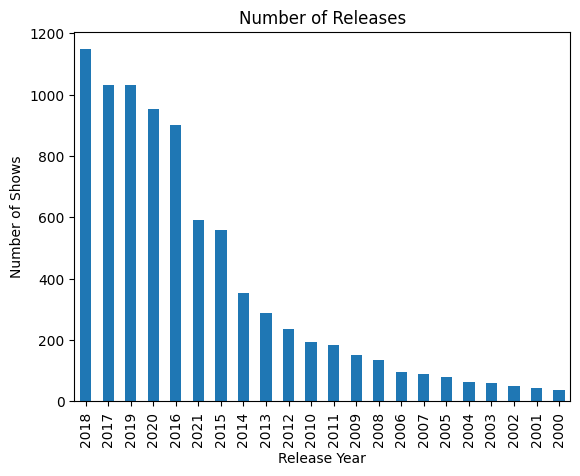

In [284]:
data['release_year'].value_counts().plot(kind='bar', title='Number of Releases', xlabel='Release Year', ylabel='Number of Shows')

#Netflix made the highest number of releases in the year 2018. We also observe that Netflix has exponentially increased the number of releases
#since the year 2013

print("Number of highest releases in a year is:", len(data[data['release_year']==2018]))

Q3] Graphically represent the category of the shows released of Netflix.

Categories of shows:   ['Movie' 'TV Show']


<Axes: title={'center': 'Categories of shows released by Netflix'}, ylabel='type'>

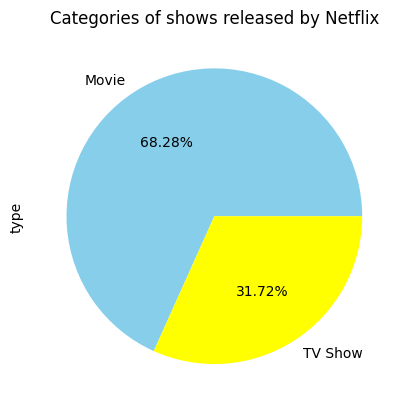

In [285]:
print("Categories of shows:  ", data['type'].unique())

data.groupby('type').type.count().plot.pie( autopct='%.2f%%', title='Categories of shows released by Netflix', colors=['skyblue', 'yellow'])

Q4] Has India produced more TV shows or movies?

India's produces on Netflix since 2000: 
 type
Movie      812
TV Show     79
Name: type, dtype: int64


India's produces on Netflix since 2014: 
 type
Movie      505
TV Show     69
Name: type, dtype: int64


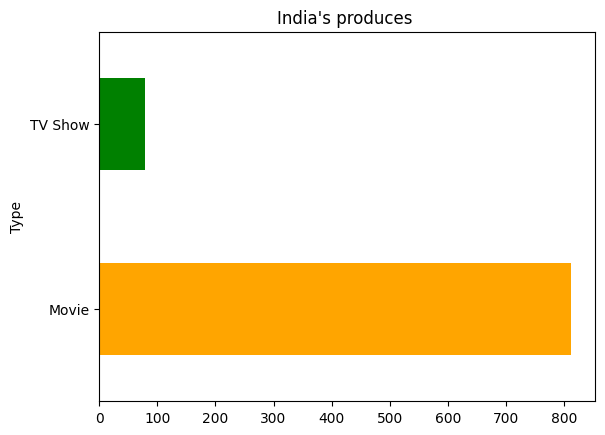

In [286]:
count_by_india=data[data['country']=='India'].groupby('type').type.count()
print("India's produces on Netflix since 2000: \n", count_by_india)

count_by_india.plot(kind='barh', title='India\'s produces ',  color=['orange', 'green'], ylabel='Type')

#By this, we infer that India primarily produces Movies for the Netflix platform

recent_count=data[(data['country']=='India') & (data['release_year']>2013)].groupby('type').type.count()
print("\n\nIndia's produces on Netflix since 2014: \n", recent_count)

#We also observe that out of the 79 TV shows produced by India since the year 2000, 69 were produced in the period of 2014-2021. Hence, it 
#marks the possible demand of Indian TV shows on Netflix in the future

Q5] What are the different Ratings defined by Netflix?

In [287]:
print("Number of unique ratings: ",data['rating'].nunique())
print("Unique ratings: ", data['rating'].unique())

#We see that the null value is also considered in this list. Hence, there are 14 ratings defined by Netflix.

Number of unique ratings:  14
Unique ratings:  ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' nan 'NR' 'TV-Y7-FV' 'UR']


Q6] List the top 10 directors with highest movies and TV shows on Netflix.

In [288]:
data['director'].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Don Michael Paul          10
Lance Bangs                8
Robert Rodriguez           8
Name: count, dtype: int64

Q7] Which is the longest movie available on Netflix.

In [289]:
data[['value_duration', 'unit_duration']]=data['duration'].str.split(" ", expand=True)
data=data.astype({'value_duration': 'int'})
print("Longest movie on Netflix is of ", data['value_duration'].max(), " mins.")

Longest movie on Netflix is of  312  mins.


Q8] Which country has produced the maximum shows for Netflix?

In [290]:
print("The country with highest number of shows for Netflix is ", data['country'].value_counts().head(1))

The country with highest number of shows for Netflix is  country
United States    2573
Name: count, dtype: int64


Q9] What is the average duration of a movie produced by the United States? Compare with India.

In [291]:
data_new=data[(data['country']=='United States') & (data['type']=='Movie')]
print("Average duration of a movie produced by the United States: ", data_new['value_duration'].mean().round(2), "mins")

data_new=data[(data['country']=='India') & (data['type']=='Movie')]
print("Average duration of a movie produced by India: ", data_new['value_duration'].mean().round(2), "mins")

#We observe that the duration of movies produced by India is much more than those produced by the United States on an average.

Average duration of a movie produced by the United States:  89.14 mins
Average duration of a movie produced by India:  124.21 mins


Q10] Country Analysis

<Axes: title={'center': 'Movies'}, xlabel='Number of movies', ylabel='Country'>

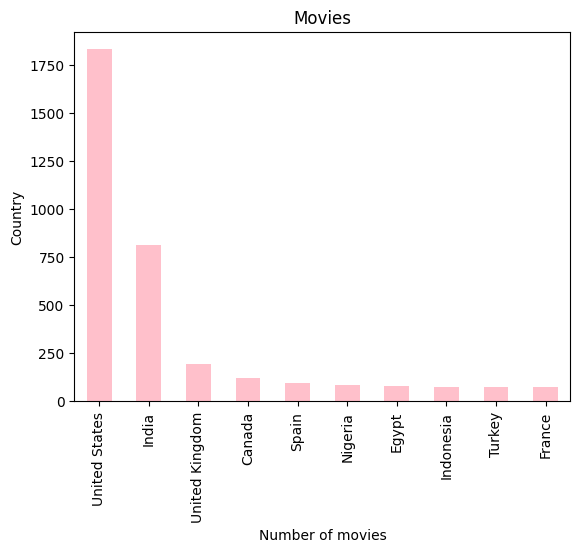

In [292]:
#Below are graphical representations of produces by the top content producing countries for Netflix
movie_count=data[data['type']=='Movie']
tvshow_count=data[data['type']=='TV Show']

movie_count['country'].value_counts().head(10).plot(kind='bar', title="Movies", xlabel='Number of movies', ylabel='Country', color='pink')

<Axes: title={'center': 'TV Shows'}, xlabel='Number of tv shows', ylabel='Country'>

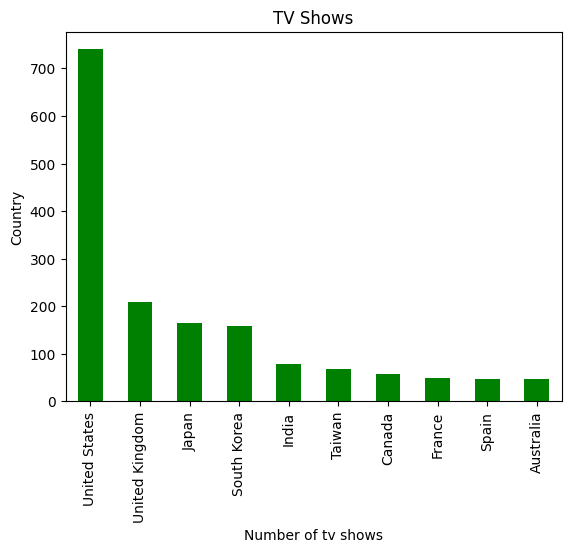

In [293]:
tvshow_count['country'].value_counts().head(10).plot(kind='bar', title="TV Shows", xlabel='Number of tv shows', ylabel='Country',
                                                   color='green',stacked=False)

### Conclusion:
1. The records date back to the year 1925.
2. The latest releases were mostly TV shows.
3. Netflix made the highest number of releases in 2018.
4. Netflix has 2 categories of shows: Movies and TV Shows.
5. India primarily produces Movies for the Netflix platform. We also observe that out of the 79 TV shows produced by India since the year 2000, 69 were produced in the period of 2014-2021. Hence, it marks the possible demand of Indian TV shows on Netflix in the future.
6. The top directors of Netflix include Rajiv Chilaka, Raúl Campos, Jan Suter, Suhas Kadav, Marcus Raboy and Jay Karas, with Rajiv Chilaka directing 19 shows.
7. Longest movie on Netflix is of  312  mins.
8. The country with highest number of shows for Netflix is United States with 2573 shows since 2000.
9. The average duration of a movie produced by the United States was 89.14 mins while that of India was 124.21 mins. Hence, the duration of movies produced by India is much more than those produced by the United States on an average.
10. The top countries producing movies include the United States, India, United Kingdom, Canada and Spain, while the top TV show producing countries were the US, UK, Japan, South Korea and India.